In [1]:
import numpy as np
from util import *
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg
import time
from IPython.display import HTML
%matplotlib inline
# %matplotlib notebook

Forward Euler

dt = 0.25, time_steps = 40000


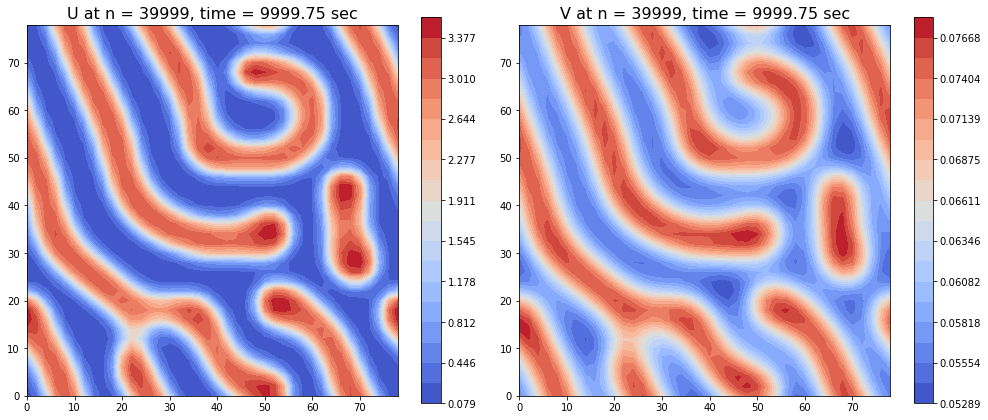

In [2]:
# Grid setup
Ny, Nx = 40, 40
h = 2
N = Nx * Ny

# Parameters setup
Du = 0.02
Dv = 2
rho = 0.001
rho_u = 0.001
mu_u = 0.02
mu_v = 0.03
kappa = 0.1

# Time steps
dt = 0.25
end_t = 10000
time_steps = int(end_t / dt)
print('dt = {}, time_steps = {}'.format(dt, time_steps))
c = dt / (h * h)

# Initial condition
np.random.seed(9001)
U_init = np.random.normal(0.5, 0.1, (Ny, Nx))
V_init = 0.1 * np.ones((Ny, Nx))

U = np.zeros((time_steps, Ny, Nx))
V = np.zeros((time_steps, Ny, Nx))
U[0] = np.copy(U_init)
V[0] = np.copy(V_init)

U_norm_arr = np.zeros((time_steps,))
V_norm_arr = np.zeros((time_steps,))
time_range = np.zeros((time_steps,))

# Start timer
# start = time.time()

# Generate pattern using own laplace function
for i in range(1, time_steps):
    U_norm_arr[i-1] = np.linalg.norm((U[i - 1]-np.mean(U[i - 1])), ord='fro')
    V_norm_arr[i-1] = np.linalg.norm((V[i - 1]-np.mean(V[i - 1])), ord='fro')
    time_range[i-1] = (i-1) * dt
    
    U[i] = Du * c * my_laplacian(U[i - 1])
    V[i] = Dv * c * my_laplacian(V[i - 1])

    U[i] += dt * rho/V[i - 1] * U[i - 1]**2 / (1 + kappa*U[i - 1]**2) + (1 - dt * mu_u) * U[i - 1] + dt * rho_u
    V[i] += dt * rho * U[i - 1]**2 / (1 + kappa*U[i - 1]**2) + (1 - dt * mu_v) * V[i - 1]

# print('elapsed_clock_time = %s' % (time.time() - start))
U_norm_arr[-1] = np.linalg.norm((U[-1]-np.mean(U[-1])), ord='fro')
V_norm_arr[-1] = np.linalg.norm((V[-1]-np.mean(V[-1])), ord='fro')
time_range[-1] = (time_steps-1) * dt

# np.save('../ndarr_UV/U_fwd_GM', U)
# np.save('../ndarr_UV/V_fwd_GM', V)

# U_fwd = np.load('../ndarr_UV/U_fwd_GM.npy')
# V_fwd = np.load('../ndarr_UV/V_fwd_GM.npy')

plot_pattern(U, V, time_steps - 1, time_steps - 1, h, dt, filled=True)

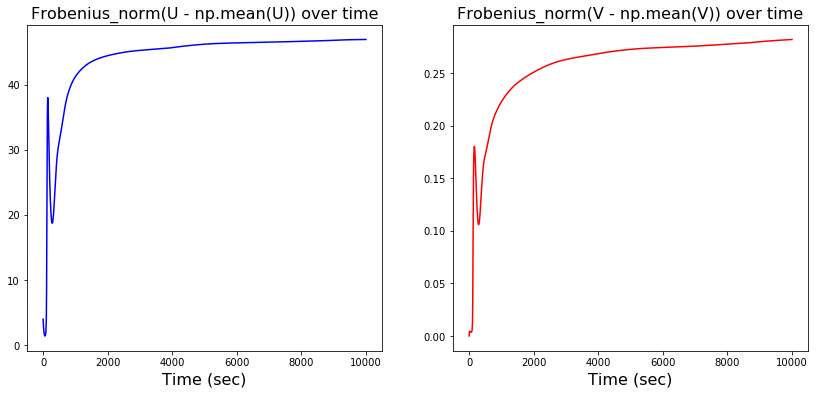

In [3]:
# Plot the evolution of the pattern's Frobenius Norm over time
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
axes[0].plot(time_range, U_norm_arr, 'b-')
axes[0].set_title('Frobenius_norm(U - np.mean(U)) over time', fontsize=16)
axes[0].set_xlabel('Time (sec)', fontsize=16)
axes[1].plot(time_range, V_norm_arr, 'r-')
axes[1].set_title('Frobenius_norm(V - np.mean(V)) over time', fontsize=16)
axes[1].set_xlabel('Time (sec)', fontsize=16)
plt.show()


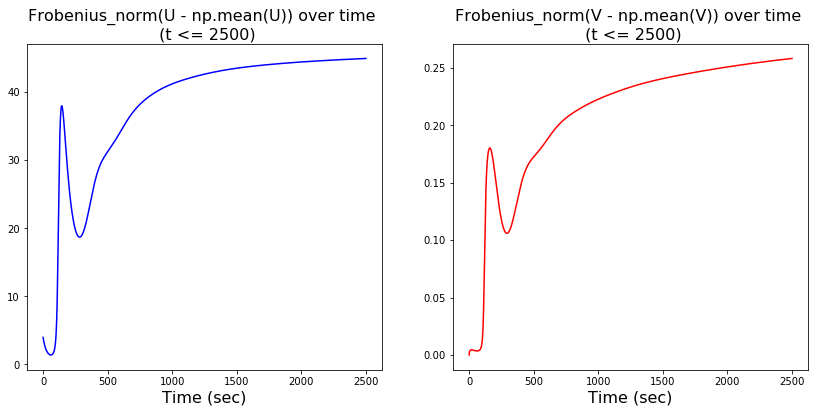

In [4]:
# Plot the evolution of the pattern's Frobenius Norm over time
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
cutoff = int(time_steps/4)
axes[0].plot(time_range[:cutoff], U_norm_arr[:cutoff], 'b-')
axes[0].set_title('Frobenius_norm(U - np.mean(U)) over time \n (t <= 2500)', fontsize=16)
axes[0].set_xlabel('Time (sec)', fontsize=16)
axes[1].plot(time_range[:cutoff], V_norm_arr[:cutoff], 'r-')
axes[1].set_title('Frobenius_norm(V - np.mean(V)) over time \n (t <= 2500)', fontsize=16)
axes[1].set_xlabel('Time (sec)', fontsize=16)
plt.show()

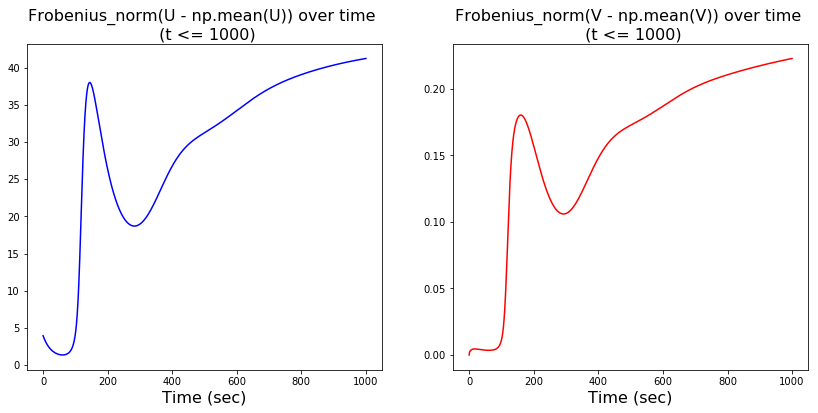

In [5]:
# Plot the evolution of the pattern's Frobenius Norm over time
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
cutoff = int(time_steps/10)
axes[0].plot(time_range[:cutoff], U_norm_arr[:cutoff], 'b-')
axes[0].set_title('Frobenius_norm(U - np.mean(U)) over time \n (t <= 1000)', fontsize=16)
axes[0].set_xlabel('Time (sec)', fontsize=16)
axes[1].plot(time_range[:cutoff], V_norm_arr[:cutoff], 'r-')
axes[1].set_title('Frobenius_norm(V - np.mean(V)) over time \n (t <= 1000)', fontsize=16)
axes[1].set_xlabel('Time (sec)', fontsize=16)
plt.show()

In [6]:
# # Numerical stability analysis - Forward Euler

# # Grid setup
# Ny, Nx = 40, 40
# h = 2
# N = Nx * Ny

# # Parameters setup
# Du = 0.02
# Dv = 2
# rho = 0.001
# rho_u = 0.001
# mu_u = 0.02
# mu_v = 0.03
# kappa = 0.1

# # Time steps
# dt_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

# for dt in dt_list:
#     end_t = 2000
#     time_steps = int(end_t / dt)
#     c = dt / (h * h)

#     # Initial condition
#     np.random.seed(9001)
#     U_init = np.random.normal(0.5, 0.1, (Ny, Nx))
#     V_init = 0.1 * np.ones((Ny, Nx))

#     U = np.zeros((time_steps, Ny, Nx))
#     V = np.zeros((time_steps, Ny, Nx))
#     U[0] = np.copy(U_init)
#     V[0] = np.copy(V_init)
#     time_durations = []

#     # Start timer
#     start = time.time()

#     # Generate pattern using own laplace function
#     for i in range(1, time_steps):
#         U[i] = Du * c * my_laplacian(U[i - 1])
#         V[i] = Dv * c * my_laplacian(V[i - 1])

#         U[i] += dt * rho/V[i - 1] * U[i - 1]**2 / (1 + kappa*U[i - 1]**2) + (1 - dt * mu_u) * U[i - 1] + dt * rho_u
#         V[i] += dt * rho * U[i - 1]**2 / (1 + kappa*U[i - 1]**2) + (1 - dt * mu_v) * V[i - 1]

#     print('dt = %.2f: elapsed_clock_time = %s' % (dt, (time.time() - start)))



In [7]:
# ani = animate_pattern(U, V, h, dt, Nsteps=time_steps, Nout=50)
# HTML(ani.to_html5_video())

Backward Euler

dt = 20, time_steps = 500
3.51353686472 0.0735530177124 0.0781492369854 0.051095957576


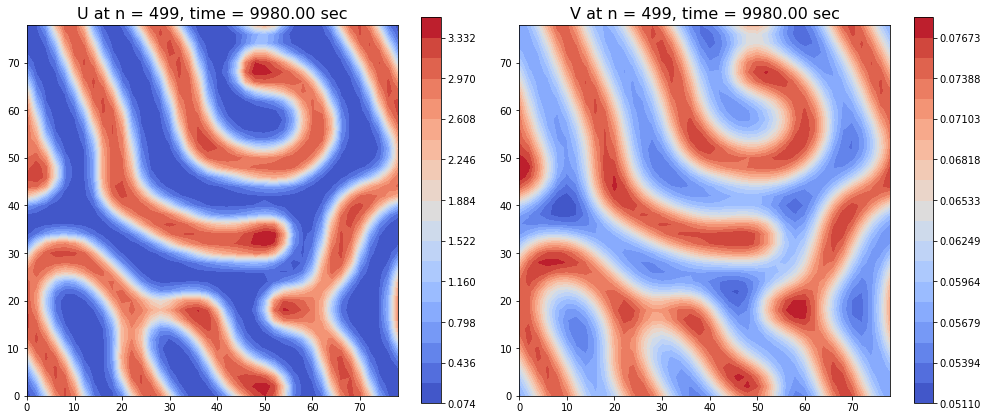

In [8]:
# Grid setup
Ny, Nx = 40, 40
h = 2
N = Nx * Ny

# Parameters setup
Du = 0.02
Dv = 2
rho = 0.001
rho_u = 0.001
mu_u = 0.02
mu_v = 0.03
kappa = 0.1

# Time steps
dt = 20
end_t = 10000
time_steps = int(end_t / dt)
print('dt = {}, time_steps = {}'.format(dt, time_steps))
c = dt / (h * h)

# Construct the transform matrix of U and V
# L = Laplace_matrix(Ny, Nx)
L = Laplace_matrix_sparse(Ny, Nx)
Tu = sparse.eye(N) - Du * c * L
Tv = sparse.eye(N) - Dv * c * L

# Factorize Tu, Tv
solve_Tu = linalg.factorized(Tu.tocsc())
solve_Tv = linalg.factorized(Tv.tocsc())

# Initial condition
np.random.seed(9001)
U_init = np.random.normal(0.5, 0.1, (Ny, Nx))
V_init = 0.1 * np.ones((Ny, Nx))

U1d = np.zeros((time_steps, N))
V1d = np.zeros((time_steps, N))
U1d[0] = np.copy(U_init.flatten())
V1d[0] = np.copy(V_init.flatten())

U_norm_arr = np.zeros((time_steps,))
V_norm_arr = np.zeros((time_steps,))
time_range = np.zeros((time_steps,))


# Start timer
# start = time.time()

# Backward Euler
for i in range(1, time_steps):
    U_norm_arr[i-1] = np.linalg.norm((U1d[i - 1]-np.mean(U1d[i - 1])))
    V_norm_arr[i-1] = np.linalg.norm((V1d[i - 1]-np.mean(V1d[i - 1])))
    time_range[i-1] = (i-1) * dt
    
    bU = dt * rho/V1d[i - 1] * U1d[i - 1]**2 / (1 + kappa*U1d[i - 1]**2) + (1 - dt * mu_u) * U1d[i - 1] + dt * rho_u
    U1d[i] = solve_Tu(bU)

    bV = dt * rho * U1d[i - 1]**2 / (1 + kappa*U1d[i - 1]**2) + (1 - dt * mu_v) * V1d[i - 1]
    V1d[i] = solve_Tv(bV)

# print('elapsed_clock_time = %s' % (time.time() - start))

U_norm_arr[-1] = np.linalg.norm((U1d[-1]-np.mean(U1d[-1])))
V_norm_arr[-1] = np.linalg.norm((V1d[-1]-np.mean(V1d[-1])))
time_range[-1] = (time_steps-1) * dt

U2d = U1d.reshape((time_steps, Ny, Nx))
V2d = V1d.reshape((time_steps, Ny, Nx))

# np.save('../ndarr_UV/U_bck', U2d)
# np.save('../ndarr_UV/V_bck', V2d)

# U_bck = np.load('../ndarr_UV/U_bck.npy')
# V_bck = np.load('../ndarr_UV/V_bck.npy')

print(np.max(U2d[-1]), np.min(U2d[-1]), np.max(V2d[-1]), np.min(V2d[-1]))

plot_pattern(U2d, V2d, time_steps-1, time_steps-1, h, dt, filled=True)

# ani = animate_pattern(U_bck, V_bck, h, dt, Nsteps=time_steps, Nout=2)
# ani.save('../ani/pattern_bck.mp4', fps=15)

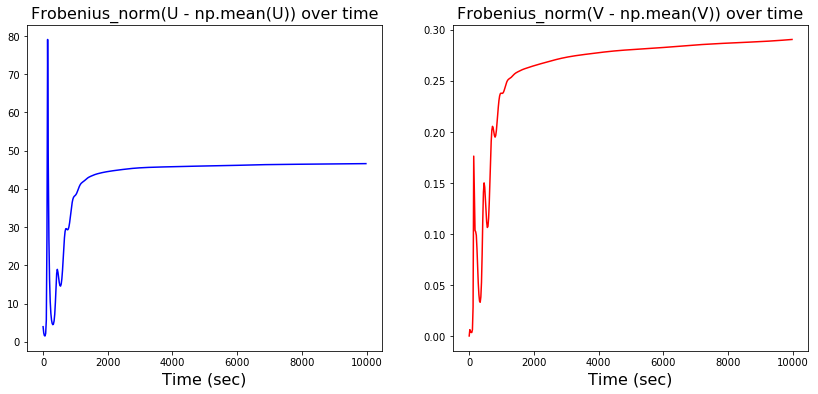

In [9]:
# Plot the evolution of the pattern's Frobenius Norm over time
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
axes[0].plot(time_range, U_norm_arr, 'b-')
axes[0].set_title('Frobenius_norm(U - np.mean(U)) over time', fontsize=16)
axes[0].set_xlabel('Time (sec)', fontsize=16)
axes[1].plot(time_range, V_norm_arr, 'r-')
axes[1].set_title('Frobenius_norm(V - np.mean(V)) over time', fontsize=16)
axes[1].set_xlabel('Time (sec)', fontsize=16)
plt.show()

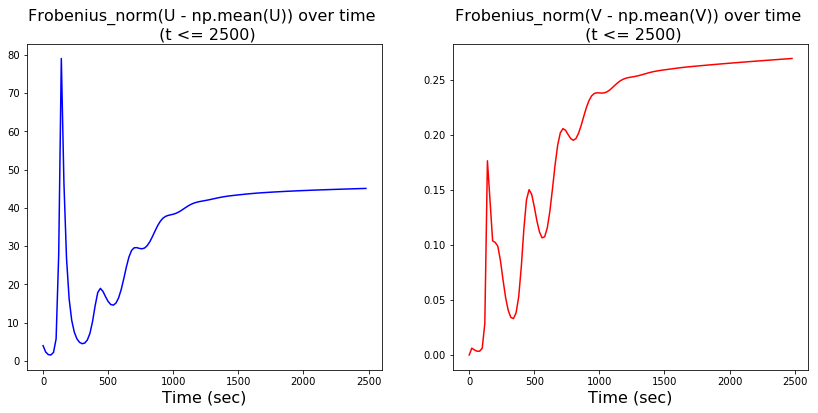

In [10]:
# Plot the evolution of the pattern's Frobenius Norm over time
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
cutoff = int(time_steps/4)
axes[0].plot(time_range[:cutoff], U_norm_arr[:cutoff], 'b-')
axes[0].set_title('Frobenius_norm(U - np.mean(U)) over time \n (t <= 2500)', fontsize=16)
axes[0].set_xlabel('Time (sec)', fontsize=16)
axes[1].plot(time_range[:cutoff], V_norm_arr[:cutoff], 'r-')
axes[1].set_title('Frobenius_norm(V - np.mean(V)) over time \n (t <= 2500)', fontsize=16)
axes[1].set_xlabel('Time (sec)', fontsize=16)
plt.show()

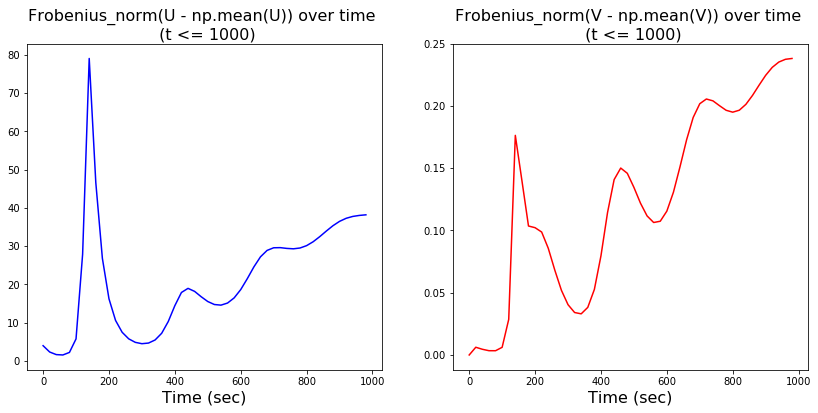

In [11]:
# Plot the evolution of the pattern's Frobenius Norm over time
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
cutoff = int(time_steps/10)
axes[0].plot(time_range[:cutoff], U_norm_arr[:cutoff], 'b-')
axes[0].set_title('Frobenius_norm(U - np.mean(U)) over time \n (t <= 1000)', fontsize=16)
axes[0].set_xlabel('Time (sec)', fontsize=16)
axes[1].plot(time_range[:cutoff], V_norm_arr[:cutoff], 'r-')
axes[1].set_title('Frobenius_norm(V - np.mean(V)) over time \n (t <= 1000)', fontsize=16)
axes[1].set_xlabel('Time (sec)', fontsize=16)
plt.show()

Crank Nicolson

dt = 20, time_steps = 500
3.52919494423 0.0776177715289 0.0780539646036 0.051326822856


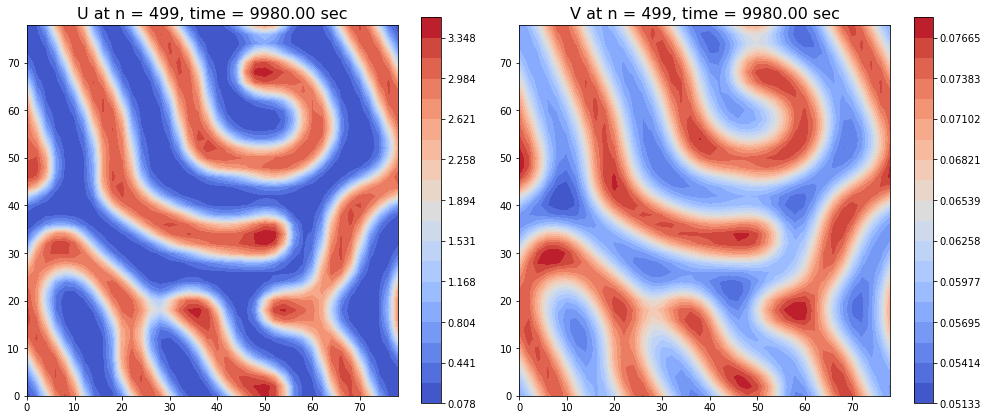

In [12]:
# Grid setup
Ny, Nx = 40, 40
h = 2
N = Nx * Ny

# Parameters setup
Du = 0.02
Dv = 2
rho = 0.001
rho_u = 0.001
mu_u = 0.02
mu_v = 0.03
kappa = 0.1

# Time steps
dt = 20
end_t = 10000
time_steps = int(end_t / dt)
print('dt = {}, time_steps = {}'.format(dt, time_steps))
c = dt / (h * h)


# Construct the transform matrix of U and V
# L = Laplace_matrix(Ny, Nx)
L = Laplace_matrix_sparse(Ny, Nx)
Tu = sparse.eye(N) - 0.5 * Du * c * L
Tv = sparse.eye(N) - 0.5 * Dv * c * L

# Factorize Tu, Tv
solve_Tu = linalg.factorized(Tu.tocsc())
solve_Tv = linalg.factorized(Tv.tocsc())

# Initial condition
np.random.seed(9001)
U_init = np.random.normal(0.5, 0.1, (Ny, Nx))
V_init = 0.1 * np.ones((Ny, Nx))

U1d = np.zeros((time_steps, N))
V1d = np.zeros((time_steps, N))
U1d[0] = np.copy(U_init.flatten())
V1d[0] = np.copy(V_init.flatten())

U_norm_arr = np.zeros((time_steps,))
V_norm_arr = np.zeros((time_steps,))
time_range = np.zeros((time_steps,))

# Start timer
# start = time.time()

# CN Method
for i in range(1, time_steps):
    U_norm_arr[i-1] = np.linalg.norm((U1d[i - 1]-np.mean(U1d[i - 1])))
    V_norm_arr[i-1] = np.linalg.norm((V1d[i - 1]-np.mean(V1d[i - 1])))
    time_range[i-1] = (i-1) * dt
    
    bU = (0.5 * Du * c) * L.dot(U1d[i - 1]) \
    + dt * rho/V1d[i - 1] * U1d[i - 1]**2 / (1 + kappa*U1d[i - 1]**2) + (1 - dt * mu_u) * U1d[i - 1] + dt * rho_u
    U1d[i] = solve_Tu(bU)

    bV = (0.5 * Dv * c) * L.dot(V1d[i - 1]) \
    + dt * rho * U1d[i - 1]**2 / (1 + kappa*U1d[i - 1]**2) + (1 - dt * mu_v) * V1d[i - 1]
    V1d[i] = solve_Tv(bV)

# print('elapsed_clock_time = %s' % (time.time() - start))

U_norm_arr[-1] = np.linalg.norm((U1d[-1]-np.mean(U1d[-1])))
V_norm_arr[-1] = np.linalg.norm((V1d[-1]-np.mean(V1d[-1])))
time_range[-1] = (time_steps-1) * dt

U2d = U1d.reshape((time_steps, Ny, Nx))
V2d = V1d.reshape((time_steps, Ny, Nx))

# np.save('../ndarr_UV/U_bck', U2d)
# np.save('../ndarr_UV/V_bck', V2d)

# U_bck = np.load('../ndarr_UV/U_bck.npy')
# V_bck = np.load('../ndarr_UV/V_bck.npy')

print(np.max(U2d[-1]), np.min(U2d[-1]), np.max(V2d[-1]), np.min(V2d[-1]))

plot_pattern(U2d, V2d, time_steps-1, time_steps-1, h, dt, filled=True)

# ani = animate_pattern(U_bck, V_bck, h, dt, Nsteps=time_steps, Nout=2)
# ani.save('../ani/pattern_bck.mp4', fps=15)

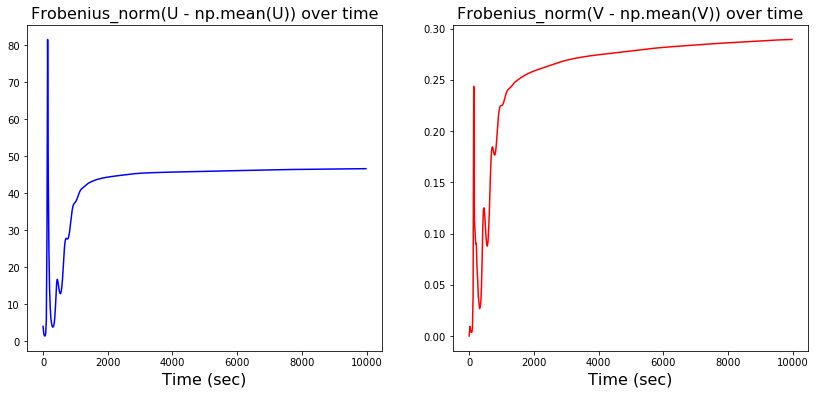

In [13]:
# Plot the evolution of the pattern's Frobenius Norm over time
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
axes[0].plot(time_range, U_norm_arr, 'b-')
axes[0].set_title('Frobenius_norm(U - np.mean(U)) over time', fontsize=16)
axes[0].set_xlabel('Time (sec)', fontsize=16)
axes[1].plot(time_range, V_norm_arr, 'r-')
axes[1].set_title('Frobenius_norm(V - np.mean(V)) over time', fontsize=16)
axes[1].set_xlabel('Time (sec)', fontsize=16)
plt.show()

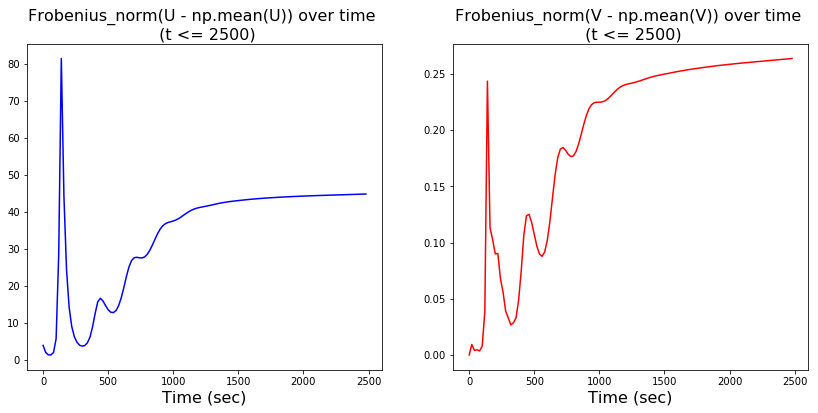

In [14]:
# Plot the evolution of the pattern's Frobenius Norm over time
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
cutoff = int(time_steps/4)
axes[0].plot(time_range[:cutoff], U_norm_arr[:cutoff], 'b-')
axes[0].set_title('Frobenius_norm(U - np.mean(U)) over time \n (t <= 2500)', fontsize=16)
axes[0].set_xlabel('Time (sec)', fontsize=16)
axes[1].plot(time_range[:cutoff], V_norm_arr[:cutoff], 'r-')
axes[1].set_title('Frobenius_norm(V - np.mean(V)) over time \n (t <= 2500)', fontsize=16)
axes[1].set_xlabel('Time (sec)', fontsize=16)
plt.show()

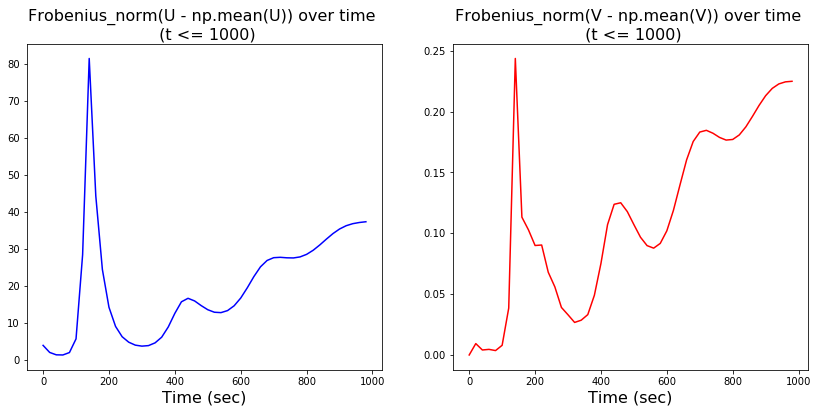

In [15]:
# Plot the evolution of the pattern's Frobenius Norm over time
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
cutoff = int(time_steps/10)
axes[0].plot(time_range[:cutoff], U_norm_arr[:cutoff], 'b-')
axes[0].set_title('Frobenius_norm(U - np.mean(U)) over time \n (t <= 1000)', fontsize=16)
axes[0].set_xlabel('Time (sec)', fontsize=16)
axes[1].plot(time_range[:cutoff], V_norm_arr[:cutoff], 'r-')
axes[1].set_title('Frobenius_norm(V - np.mean(V)) over time \n (t <= 1000)', fontsize=16)
axes[1].set_xlabel('Time (sec)', fontsize=16)
plt.show()

ADI Method

dt = 20, time_steps = 500


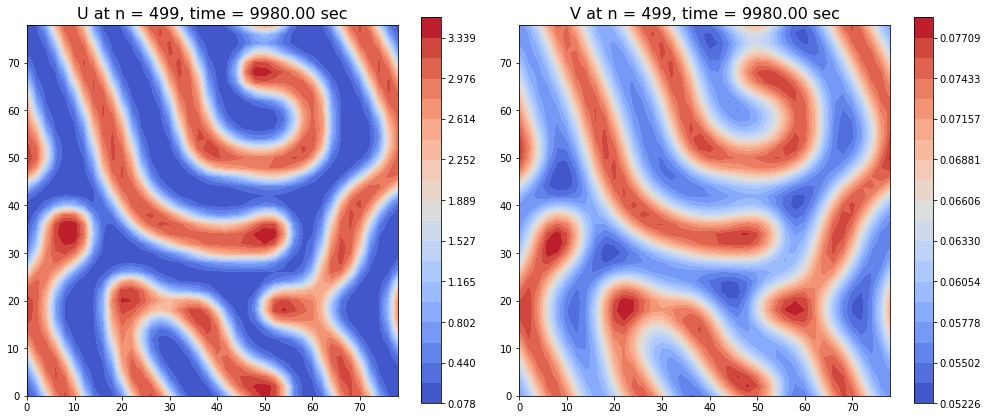

In [16]:
# Grid setup
Ny, Nx = 40, 40
h = 2
N = Nx * Ny

# Parameters setup
Du = 0.02
Dv = 2
rho = 0.001
rho_u = 0.001
mu_u = 0.02
mu_v = 0.03
kappa = 0.1

# Time steps
dt = 20
end_t = 10000
time_steps = int(end_t / dt)
print('dt = {}, time_steps = {}'.format(dt, time_steps))
c = dt / (h * h)


# Construct transform matrices
D2x = sparse.diags([-2, 1, 1, 1, 1], [0, 1, -1, 1 - Nx, -1 + Nx], shape=(Nx, Nx))
D2y = sparse.diags([-2, 1, 1, 1, 1], [0, 1, -1, 1 - Ny, -1 + Ny], shape=(Ny, Ny))
Tu_x = sparse.eye(Nx) - 0.5 * Du * c * D2x
Tu_y = sparse.eye(Ny) - 0.5 * Du * c * D2y
Tv_x = sparse.eye(Nx) - 0.5 * Dv * c * D2x
Tv_y = sparse.eye(Ny) - 0.5 * Dv * c * D2y

# Factorize matrices
solve_Tu_x = linalg.factorized(Tu_x.tocsc())
solve_Tu_y = linalg.factorized(Tu_y.tocsc())
solve_Tv_x = linalg.factorized(Tv_x.tocsc())
solve_Tv_y = linalg.factorized(Tv_y.tocsc())

# Initial condition
np.random.seed(9001)
U_init = np.random.normal(0.5, 0.1, (Ny, Nx))
V_init = 0.1 * np.ones((Ny, Nx))

U = np.zeros((time_steps, Ny, Nx))
V = np.zeros((time_steps, Ny, Nx))
U[0] = np.copy(U_init)
V[0] = np.copy(V_init)

U_norm_arr = np.zeros((time_steps,))
V_norm_arr = np.zeros((time_steps,))
time_range = np.zeros((time_steps,))

# Start timer
# start = time.time()

# Generate pattern
for i in range(1, time_steps):
    U_norm_arr[i-1] = np.linalg.norm((U[i - 1]-np.mean(U[i - 1])), ord='fro')
    V_norm_arr[i-1] = np.linalg.norm((V[i - 1]-np.mean(V[i - 1])), ord='fro')
    time_range[i-1] = (i-1) * dt
    
    # Stage one - solve along x direction
    b1U = 0.5 * Du * c * D2y.dot(U[i - 1]) + 0.5 * dt * rho/V[i - 1] * U[i - 1]**2 / (1 + kappa*U[i - 1]**2) \
        + (1 - 0.5 * dt * mu_u) * U[i - 1] + 0.5 * dt * rho_u
    b1V = 0.5 * Dv * c * D2y.dot(V[i - 1]) \
        + 0.5 * dt * rho * U[i - 1]**2 / (1 + kappa*U[i - 1]**2) + (1 - 0.5 * dt * mu_v) * V[i - 1]

    U_middle = solve_Tu_x(b1U.T)
    V_middle = solve_Tv_x(b1V.T)

    # Stage two - solve along y direction
    b2U = 0.5 * Du * c * D2x.dot(U_middle) + 0.5 * dt * rho/V_middle * U_middle**2 / (1 + kappa*U_middle**2) \
        + (1 - 0.5 * dt * mu_u) * U_middle + 0.5 * dt * rho_u
    b2V = 0.5 * Dv * c * D2x.dot(V_middle) \
        + 0.5 * dt * rho * U_middle**2 / (1 + kappa*U_middle**2) + (1 - 0.5 * dt * mu_v) * V_middle

    U[i] = solve_Tu_y(b2U.T)
    V[i] = solve_Tv_y(b2V.T)

# print('elapsed_clock_time = %s' % (time.time() - start))

U_norm_arr[-1] = np.linalg.norm((U[-1]-np.mean(U[-1])), ord='fro')
V_norm_arr[-1] = np.linalg.norm((V[-1]-np.mean(V[-1])), ord='fro')
time_range[-1] = (time_steps-1) * dt


# np.save('../ndarr_UV/U_adi', U)
# np.save('../ndarr_UV/V_adi', V)

# U_adi = np.load('../ndarr_UV/U_adi.npy')
# V_adi = np.load('../ndarr_UV/V_adi.npy')

plot_pattern(U, V, time_steps-1, time_steps-1, h, dt, filled=True)

# ani = animate_pattern(U_adi, V_adi, h, dt, Nsteps=time_steps, Nout=50)
# ani.save('../ani/pattern_adi.mp4', fps=15)

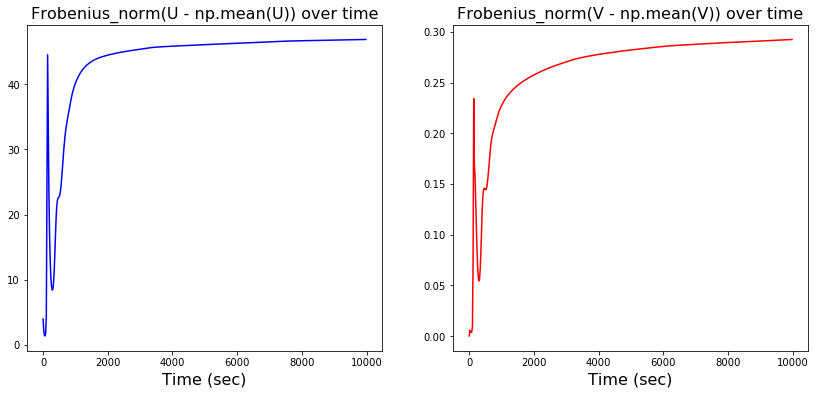

In [17]:
# Plot the evolution of the pattern's Frobenius Norm over time
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
axes[0].plot(time_range, U_norm_arr, 'b-')
axes[0].set_title('Frobenius_norm(U - np.mean(U)) over time', fontsize=16)
axes[0].set_xlabel('Time (sec)', fontsize=16)
axes[1].plot(time_range, V_norm_arr, 'r-')
axes[1].set_title('Frobenius_norm(V - np.mean(V)) over time', fontsize=16)
axes[1].set_xlabel('Time (sec)', fontsize=16)
plt.show()

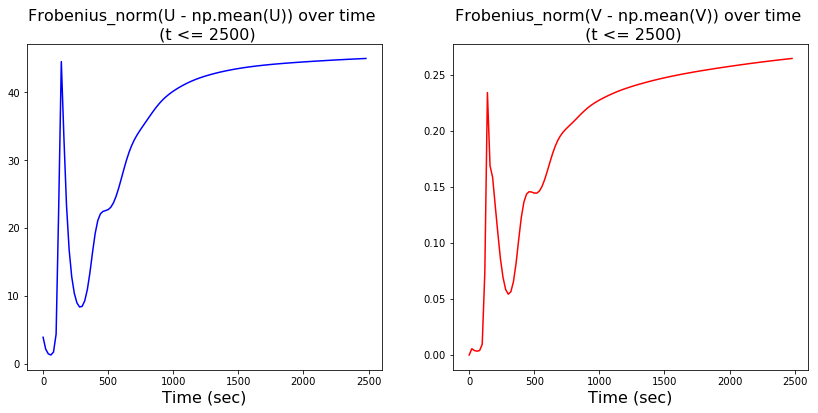

In [18]:
# Plot the evolution of the pattern's Frobenius Norm over time
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
cutoff = int(time_steps/4)
axes[0].plot(time_range[:cutoff], U_norm_arr[:cutoff], 'b-')
axes[0].set_title('Frobenius_norm(U - np.mean(U)) over time \n (t <= 2500)', fontsize=16)
axes[0].set_xlabel('Time (sec)', fontsize=16)
axes[1].plot(time_range[:cutoff], V_norm_arr[:cutoff], 'r-')
axes[1].set_title('Frobenius_norm(V - np.mean(V)) over time \n (t <= 2500)', fontsize=16)
axes[1].set_xlabel('Time (sec)', fontsize=16)
plt.show()

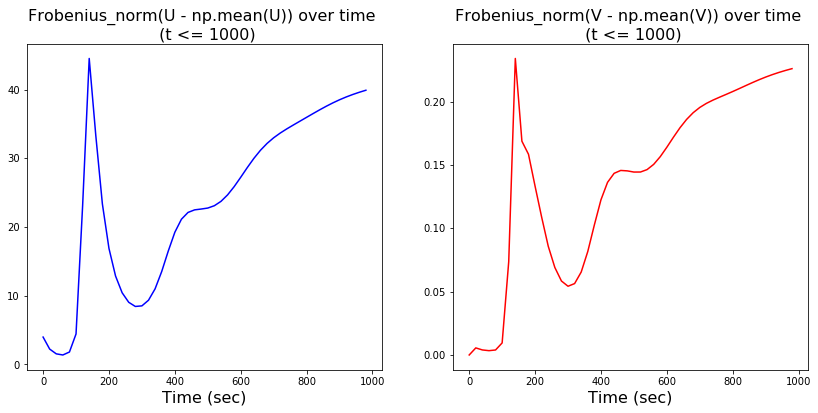

In [19]:
# Plot the evolution of the pattern's Frobenius Norm over time
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
cutoff = int(time_steps/10)
axes[0].plot(time_range[:cutoff], U_norm_arr[:cutoff], 'b-')
axes[0].set_title('Frobenius_norm(U - np.mean(U)) over time \n (t <= 1000)', fontsize=16)
axes[0].set_xlabel('Time (sec)', fontsize=16)
axes[1].plot(time_range[:cutoff], V_norm_arr[:cutoff], 'r-')
axes[1].set_title('Frobenius_norm(V - np.mean(V)) over time \n (t <= 1000)', fontsize=16)
axes[1].set_xlabel('Time (sec)', fontsize=16)
plt.show()